In [1]:
from keras.applications import VGG16
from src.vis import utils
from src.vis.utils import utils
from keras import activations
from keras.models import model_from_json
from src.models.model_manager import get_optimizer
from matplotlib import pyplot as plt



json_file = open('D:\Work\AITeam\multiclass_keras\models/model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# convert json to keras model file
model = model_from_json(loaded_model_json)
#load woeights into new model
model.load_weights("D:\Work\AITeam\multiclass_keras\models/model.h5")
model.compile(loss='categorical_crossentropy', optimizer=get_optimizer())
print(model.summary())

layer_idx = utils.find_layer_idx(model, 'Dense_2')
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
print(model.summary())

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Convolution2D_236 (Conv2D)      (None, 112, 112, 32) 896         Input_1[0][0]                    
__________________________________________________________________________________________________
Convolution2D_235 (Conv2D)      (None, 112, 112, 32) 9248        Convolution2D_236[0][0]          
__________________________________________________________________________________________________
Convolution2D_237 (Conv2D)      (None, 110, 110, 64) 18496       Convolution2D_235[0][0]          
__________________________________________________________________________________________________
MaxPooling

D:\Work\AITeam\multiclass_keras\venv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Work\AITeam\multiclass_keras\venv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


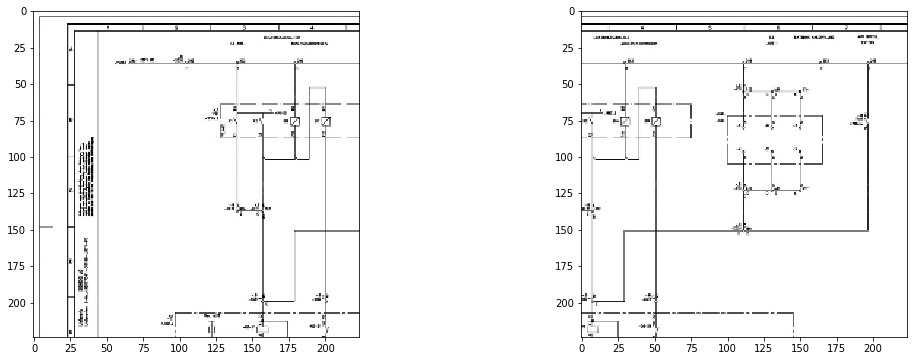

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)
img1 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_0.jpg', target_size=(224, 224))
img2 = utils.load_img('D:/Work\AITeam/multiclass_keras/data/processed/transformed/Etechnik_JPG_Plaene/Etechnik_JPG_Plaene6_1.jpg', target_size=(224, 224))
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [21]:
from src.vis.losses import ActivationMaximization
from src.vis.regularizers import TotalVariation, LPNorm
import imageio
from src.vis.optimizer import Optimizer
from src.vis.callbacks import GifGenerator


# Build the VGG16 network with ImageNet weights
print('Model loaded.')

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
#layer_name = 'Convolution2D_130'
#layer_name = 'Flatten_5'
layer_name = 'Dense_14'
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
output_class = [4]

losses = [
    (ActivationMaximization(layer_dict[layer_name], output_class), 0.1),
    (LPNorm(model.input), 1),
    (TotalVariation(model.input), 1)
]
opt = Optimizer(model.input, losses)
opt.minimize(max_iter=200, verbose=True, callbacks=[GifGenerator('opt_progress')])

Model loaded.


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 1, named_losses: [('ActivationMax Loss', 43.001003),
 ('L-6.0 Norm Loss', 0.006325754),
 ('TV(2.0) Loss', 644.9829)], overall loss: 687.990234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 2, named_losses: [('ActivationMax Loss', 78.99909),
 ('L-6.0 Norm Loss', 0.0063104257),
 ('TV(2.0) Loss', 545.6794)], overall loss: 624.684814453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 3, named_losses: [('ActivationMax Loss', 85.78304),
 ('L-6.0 Norm Loss', 0.0063019763),
 ('TV(2.0) Loss', 490.0272)], overall loss: 575.8165283203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 4, named_losses: [('ActivationMax Loss', -1.4061103),
 ('L-6.0 Norm Loss', 0.006294976),
 ('TV(2.0) Loss', 446.69452)], overall loss: 445.2947082519531


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 5, named_losses: [('ActivationMax Loss', -43.31123),
 ('L-6.0 Norm Loss', 0.0062886346),
 ('TV(2.0) Loss', 407.3969)], overall loss: 364.09197998046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 6, named_losses: [('ActivationMax Loss', -55.264492),
 ('L-6.0 Norm Loss', 0.006283368),
 ('TV(2.0) Loss', 375.6456)], overall loss: 320.38739013671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 7, named_losses: [('ActivationMax Loss', -134.89424),
 ('L-6.0 Norm Loss', 0.00627955),
 ('TV(2.0) Loss', 351.90308)], overall loss: 217.01512145996094


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 8, named_losses: [('ActivationMax Loss', -185.45149),
 ('L-6.0 Norm Loss', 0.006276477),
 ('TV(2.0) Loss', 332.4511)], overall loss: 147.00588989257812


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 9, named_losses: [('ActivationMax Loss', -268.21762),
 ('L-6.0 Norm Loss', 0.0062751407),
 ('TV(2.0) Loss', 321.5745)], overall loss: 53.3631591796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 10, named_losses: [('ActivationMax Loss', -308.64044),
 ('L-6.0 Norm Loss', 0.0062736627),
 ('TV(2.0) Loss', 309.6437)], overall loss: 1.009552001953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 11, named_losses: [('ActivationMax Loss', -362.6329),
 ('L-6.0 Norm Loss', 0.006272241),
 ('TV(2.0) Loss', 298.95084)], overall loss: -63.67578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 12, named_losses: [('ActivationMax Loss', -395.77194),
 ('L-6.0 Norm Loss', 0.006270971),
 ('TV(2.0) Loss', 288.47867)], overall loss: -107.28701782226562


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 13, named_losses: [('ActivationMax Loss', -470.82535),
 ('L-6.0 Norm Loss', 0.006270084),
 ('TV(2.0) Loss', 280.00745)], overall loss: -190.8116455078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 14, named_losses: [('ActivationMax Loss', -530.4514),
 ('L-6.0 Norm Loss', 0.0062694927),
 ('TV(2.0) Loss', 272.6505)], overall loss: -257.79461669921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 15, named_losses: [('ActivationMax Loss', -600.97424),
 ('L-6.0 Norm Loss', 0.0062693805),
 ('TV(2.0) Loss', 267.29532)], overall loss: -333.6726379394531


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 16, named_losses: [('ActivationMax Loss', -664.0535),
 ('L-6.0 Norm Loss', 0.0062694084),
 ('TV(2.0) Loss', 262.71368)], overall loss: -401.33355712890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 17, named_losses: [('ActivationMax Loss', -719.1101),
 ('L-6.0 Norm Loss', 0.006269774),
 ('TV(2.0) Loss', 259.5361)], overall loss: -459.5677185058594


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 18, named_losses: [('ActivationMax Loss', -798.3851),
 ('L-6.0 Norm Loss', 0.006270319),
 ('TV(2.0) Loss', 257.39508)], overall loss: -540.9837036132812


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 19, named_losses: [('ActivationMax Loss', -878.2348),
 ('L-6.0 Norm Loss', 0.0062711486),
 ('TV(2.0) Loss', 256.44754)], overall loss: -621.781005859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 20, named_losses: [('ActivationMax Loss', -926.3864),
 ('L-6.0 Norm Loss', 0.0062722736),
 ('TV(2.0) Loss', 256.65118)], overall loss: -669.7289428710938


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 21, named_losses: [('ActivationMax Loss', -989.0288),
 ('L-6.0 Norm Loss', 0.006273345),
 ('TV(2.0) Loss', 256.9041)], overall loss: -732.118408203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 22, named_losses: [('ActivationMax Loss', -1046.036),
 ('L-6.0 Norm Loss', 0.006274531),
 ('TV(2.0) Loss', 257.45044)], overall loss: -788.579345703125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 23, named_losses: [('ActivationMax Loss', -1108.2441),
 ('L-6.0 Norm Loss', 0.006275898),
 ('TV(2.0) Loss', 258.36044)], overall loss: -849.87744140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 24, named_losses: [('ActivationMax Loss', -1166.4557),
 ('L-6.0 Norm Loss', 0.0062775356),
 ('TV(2.0) Loss', 260.58023)], overall loss: -905.8692626953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 25, named_losses: [('ActivationMax Loss', -1227.6176),
 ('L-6.0 Norm Loss', 0.006278885),
 ('TV(2.0) Loss', 261.58832)], overall loss: -966.0230102539062


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 26, named_losses: [('ActivationMax Loss', -1290.3167),
 ('L-6.0 Norm Loss', 0.0062806834),
 ('TV(2.0) Loss', 263.95377)], overall loss: -1026.356689453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 27, named_losses: [('ActivationMax Loss', -1336.6703),
 ('L-6.0 Norm Loss', 0.006282178),
 ('TV(2.0) Loss', 265.65662)], overall loss: -1071.0074462890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 28, named_losses: [('ActivationMax Loss', -1398.6149),
 ('L-6.0 Norm Loss', 0.006284073),
 ('TV(2.0) Loss', 268.40836)], overall loss: -1130.2003173828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 29, named_losses: [('ActivationMax Loss', -1450.881),
 ('L-6.0 Norm Loss', 0.0062861852),
 ('TV(2.0) Loss', 271.56207)], overall loss: -1179.312744140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 30, named_losses: [('ActivationMax Loss', -1514.5107),
 ('L-6.0 Norm Loss', 0.0062882067),
 ('TV(2.0) Loss', 274.8044)], overall loss: -1239.699951171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 31, named_losses: [('ActivationMax Loss', -1547.9972),
 ('L-6.0 Norm Loss', 0.0062902784),
 ('TV(2.0) Loss', 278.04797)], overall loss: -1269.94287109375
Iteration: 32, named_losses: [('ActivationMax Loss', -1597.9302),
 ('L-6.0 Norm Loss', 0.006292462),
 ('TV(2.0) Loss', 281.7473)], overall loss: -1316.176513671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 33, named_losses: [('ActivationMax Loss', -1649.3456),
 ('L-6.0 Norm Loss', 0.006294604),
 ('TV(2.0) Loss', 285.67584)], overall loss: -1363.663330078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 34, named_losses: [('ActivationMax Loss', -1709.0433),
 ('L-6.0 Norm Loss', 0.0062967166),
 ('TV(2.0) Loss', 289.08832)], overall loss: -1419.94873046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 35, named_losses: [('ActivationMax Loss', -1772.263),
 ('L-6.0 Norm Loss', 0.006299339),
 ('TV(2.0) Loss', 294.0048)], overall loss: -1478.2518310546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 36, named_losses: [('ActivationMax Loss', -1817.8984),
 ('L-6.0 Norm Loss', 0.006301874),
 ('TV(2.0) Loss', 298.38806)], overall loss: -1519.5040283203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 37, named_losses: [('ActivationMax Loss', -1857.201),
 ('L-6.0 Norm Loss', 0.0063042003),
 ('TV(2.0) Loss', 302.36978)], overall loss: -1554.824951171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 38, named_losses: [('ActivationMax Loss', -1918.5817),
 ('L-6.0 Norm Loss', 0.0063069505),
 ('TV(2.0) Loss', 307.6904)], overall loss: -1610.8848876953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 39, named_losses: [('ActivationMax Loss', -1969.1979),
 ('L-6.0 Norm Loss', 0.006309361),
 ('TV(2.0) Loss', 312.07736)], overall loss: -1657.1141357421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 40, named_losses: [('ActivationMax Loss', -2018.3928),
 ('L-6.0 Norm Loss', 0.0063122544),
 ('TV(2.0) Loss', 317.53198)], overall loss: -1700.8544921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 41, named_losses: [('ActivationMax Loss', -2062.1313),
 ('L-6.0 Norm Loss', 0.006315052),
 ('TV(2.0) Loss', 322.54813)], overall loss: -1739.576904296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 42, named_losses: [('ActivationMax Loss', -2123.911),
 ('L-6.0 Norm Loss', 0.0063178814),
 ('TV(2.0) Loss', 328.13678)], overall loss: -1795.767822265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 43, named_losses: [('ActivationMax Loss', -2160.5242),
 ('L-6.0 Norm Loss', 0.006320996),
 ('TV(2.0) Loss', 333.7192)], overall loss: -1826.798583984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 44, named_losses: [('ActivationMax Loss', -2217.7007),
 ('L-6.0 Norm Loss', 0.0063242894),
 ('TV(2.0) Loss', 339.99255)], overall loss: -1877.7017822265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 45, named_losses: [('ActivationMax Loss', -2250.7168),
 ('L-6.0 Norm Loss', 0.0063269758),
 ('TV(2.0) Loss', 344.94565)], overall loss: -1905.7647705078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 46, named_losses: [('ActivationMax Loss', -2279.8557),
 ('L-6.0 Norm Loss', 0.0063301255),
 ('TV(2.0) Loss', 350.96237)], overall loss: -1928.886962890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 47, named_losses: [('ActivationMax Loss', -2343.1814),
 ('L-6.0 Norm Loss', 0.0063332994),
 ('TV(2.0) Loss', 357.26498)], overall loss: -1985.9100341796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 48, named_losses: [('ActivationMax Loss', -2394.323),
 ('L-6.0 Norm Loss', 0.0063364417),
 ('TV(2.0) Loss', 362.80524)], overall loss: -2031.511474609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 49, named_losses: [('ActivationMax Loss', -2435.6936),
 ('L-6.0 Norm Loss', 0.0063395943),
 ('TV(2.0) Loss', 368.89954)], overall loss: -2066.78759765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 50, named_losses: [('ActivationMax Loss', -2478.5764),
 ('L-6.0 Norm Loss', 0.0063428725),
 ('TV(2.0) Loss', 375.2461)], overall loss: -2103.323974609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 51, named_losses: [('ActivationMax Loss', -2525.0847),
 ('L-6.0 Norm Loss', 0.006346347),
 ('TV(2.0) Loss', 381.61313)], overall loss: -2143.46533203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 52, named_losses: [('ActivationMax Loss', -2569.479),
 ('L-6.0 Norm Loss', 0.0063495543),
 ('TV(2.0) Loss', 387.75568)], overall loss: -2181.717041015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 53, named_losses: [('ActivationMax Loss', -2607.894),
 ('L-6.0 Norm Loss', 0.00635287),
 ('TV(2.0) Loss', 394.15427)], overall loss: -2213.7333984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 54, named_losses: [('ActivationMax Loss', -2657.3374),
 ('L-6.0 Norm Loss', 0.0063563297),
 ('TV(2.0) Loss', 400.9866)], overall loss: -2256.344482421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 55, named_losses: [('ActivationMax Loss', -2708.9187),
 ('L-6.0 Norm Loss', 0.006359726),
 ('TV(2.0) Loss', 407.28772)], overall loss: -2301.62451171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 56, named_losses: [('ActivationMax Loss', -2743.8003),
 ('L-6.0 Norm Loss', 0.0063632424),
 ('TV(2.0) Loss', 414.1003)], overall loss: -2329.693603515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 57, named_losses: [('ActivationMax Loss', -2791.2617),
 ('L-6.0 Norm Loss', 0.006366829),
 ('TV(2.0) Loss', 421.09244)], overall loss: -2370.162841796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 58, named_losses: [('ActivationMax Loss', -2834.0347),
 ('L-6.0 Norm Loss', 0.0063704303),
 ('TV(2.0) Loss', 427.88275)], overall loss: -2406.1455078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 59, named_losses: [('ActivationMax Loss', -2858.6619),
 ('L-6.0 Norm Loss', 0.006374184),
 ('TV(2.0) Loss', 435.3857)], overall loss: -2423.269775390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 60, named_losses: [('ActivationMax Loss', -2915.5642),
 ('L-6.0 Norm Loss', 0.0063774292),
 ('TV(2.0) Loss', 441.2323)], overall loss: -2474.32568359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 61, named_losses: [('ActivationMax Loss', -2968.7559),
 ('L-6.0 Norm Loss', 0.006381318),
 ('TV(2.0) Loss', 448.7604)], overall loss: -2519.989013671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 62, named_losses: [('ActivationMax Loss', -3001.6792),
 ('L-6.0 Norm Loss', 0.0063847043),
 ('TV(2.0) Loss', 454.9482)], overall loss: -2546.724609375


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 63, named_losses: [('ActivationMax Loss', -3037.4255),
 ('L-6.0 Norm Loss', 0.0063883252),
 ('TV(2.0) Loss', 461.68463)], overall loss: -2575.734619140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 64, named_losses: [('ActivationMax Loss', -3086.5098),
 ('L-6.0 Norm Loss', 0.006391703),
 ('TV(2.0) Loss', 468.26413)], overall loss: -2618.2392578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 65, named_losses: [('ActivationMax Loss', -3097.4324),
 ('L-6.0 Norm Loss', 0.006395634),
 ('TV(2.0) Loss', 475.5269)], overall loss: -2621.899169921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 66, named_losses: [('ActivationMax Loss', -3174.2913),
 ('L-6.0 Norm Loss', 0.0063991584),
 ('TV(2.0) Loss', 482.3287)], overall loss: -2691.956298828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 67, named_losses: [('ActivationMax Loss', -3205.39),
 ('L-6.0 Norm Loss', 0.006403398),
 ('TV(2.0) Loss', 490.0562)], overall loss: -2715.327392578125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 68, named_losses: [('ActivationMax Loss', -3234.4265),
 ('L-6.0 Norm Loss', 0.0064077307),
 ('TV(2.0) Loss', 498.49536)], overall loss: -2735.9248046875
Iteration: 69, named_losses: [('ActivationMax Loss', -3283.8396),
 ('L-6.0 Norm Loss', 0.0064118267),
 ('TV(2.0) Loss', 505.92188)], overall loss: -2777.911376953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 70, named_losses: [('ActivationMax Loss', -3343.5935),
 ('L-6.0 Norm Loss', 0.006416164),
 ('TV(2.0) Loss', 514.5604)], overall loss: -2829.02685546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 71, named_losses: [('ActivationMax Loss', -3370.022),
 ('L-6.0 Norm Loss', 0.00642011),
 ('TV(2.0) Loss', 521.4056)], overall loss: -2848.610107421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 72, named_losses: [('ActivationMax Loss', -3409.777),
 ('L-6.0 Norm Loss', 0.006423896),
 ('TV(2.0) Loss', 528.8188)], overall loss: -2880.951904296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 73, named_losses: [('ActivationMax Loss', -3453.0493),
 ('L-6.0 Norm Loss', 0.0064288126),
 ('TV(2.0) Loss', 537.5661)], overall loss: -2915.476806640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 74, named_losses: [('ActivationMax Loss', -3482.322),
 ('L-6.0 Norm Loss', 0.0064328257),
 ('TV(2.0) Loss', 544.8225)], overall loss: -2937.4931640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 75, named_losses: [('ActivationMax Loss', -3528.9895),
 ('L-6.0 Norm Loss', 0.006437632),
 ('TV(2.0) Loss', 554.07196)], overall loss: -2974.9111328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 76, named_losses: [('ActivationMax Loss', -3559.0708),
 ('L-6.0 Norm Loss', 0.006441478),
 ('TV(2.0) Loss', 560.25)], overall loss: -2998.814453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 77, named_losses: [('ActivationMax Loss', -3604.9004),
 ('L-6.0 Norm Loss', 0.0064458814),
 ('TV(2.0) Loss', 568.661)], overall loss: -3036.23291015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 78, named_losses: [('ActivationMax Loss', -3637.9797),
 ('L-6.0 Norm Loss', 0.006450621),
 ('TV(2.0) Loss', 577.01245)], overall loss: -3060.9609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 79, named_losses: [('ActivationMax Loss', -3669.1091),
 ('L-6.0 Norm Loss', 0.006455275),
 ('TV(2.0) Loss', 585.72626)], overall loss: -3083.37646484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 80, named_losses: [('ActivationMax Loss', -3744.9648),
 ('L-6.0 Norm Loss', 0.006459275),
 ('TV(2.0) Loss', 592.82446)], overall loss: -3152.134033203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 81, named_losses: [('ActivationMax Loss', -3760.6472),
 ('L-6.0 Norm Loss', 0.00646446),
 ('TV(2.0) Loss', 601.8297)], overall loss: -3158.81103515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 82, named_losses: [('ActivationMax Loss', -3814.567),
 ('L-6.0 Norm Loss', 0.006468547),
 ('TV(2.0) Loss', 609.5096)], overall loss: -3205.051025390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 83, named_losses: [('ActivationMax Loss', -3849.1614),
 ('L-6.0 Norm Loss', 0.0064735403),
 ('TV(2.0) Loss', 618.58563)], overall loss: -3230.569091796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 84, named_losses: [('ActivationMax Loss', -3870.4758),
 ('L-6.0 Norm Loss', 0.0064784167),
 ('TV(2.0) Loss', 627.4892)], overall loss: -3242.97998046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 85, named_losses: [('ActivationMax Loss', -3936.475),
 ('L-6.0 Norm Loss', 0.0064828657),
 ('TV(2.0) Loss', 635.5578)], overall loss: -3300.91064453125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 86, named_losses: [('ActivationMax Loss', -3952.545),
 ('L-6.0 Norm Loss', 0.0064881556),
 ('TV(2.0) Loss', 644.77313)], overall loss: -3307.76513671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 87, named_losses: [('ActivationMax Loss', -4008.3508),
 ('L-6.0 Norm Loss', 0.006492158),
 ('TV(2.0) Loss', 651.4493)], overall loss: -3356.89501953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 88, named_losses: [('ActivationMax Loss', -4058.6248),
 ('L-6.0 Norm Loss', 0.006497412),
 ('TV(2.0) Loss', 660.53217)], overall loss: -3398.0859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 89, named_losses: [('ActivationMax Loss', -4071.0063),
 ('L-6.0 Norm Loss', 0.0065022935),
 ('TV(2.0) Loss', 669.274)], overall loss: -3401.725830078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 90, named_losses: [('ActivationMax Loss', -4133.428),
 ('L-6.0 Norm Loss', 0.0065076295),
 ('TV(2.0) Loss', 678.8541)], overall loss: -3454.56787109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 91, named_losses: [('ActivationMax Loss', -4148.789),
 ('L-6.0 Norm Loss', 0.0065122535),
 ('TV(2.0) Loss', 686.531)], overall loss: -3462.251708984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 92, named_losses: [('ActivationMax Loss', -4199.391),
 ('L-6.0 Norm Loss', 0.00651698),
 ('TV(2.0) Loss', 695.29486)], overall loss: -3504.08984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 93, named_losses: [('ActivationMax Loss', -4232.5947),
 ('L-6.0 Norm Loss', 0.0065217274),
 ('TV(2.0) Loss', 703.1397)], overall loss: -3529.44873046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 94, named_losses: [('ActivationMax Loss', -4283.69),
 ('L-6.0 Norm Loss', 0.0065269466),
 ('TV(2.0) Loss', 712.376)], overall loss: -3571.3076171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 95, named_losses: [('ActivationMax Loss', -4311.6577),
 ('L-6.0 Norm Loss', 0.0065320116),
 ('TV(2.0) Loss', 721.2822)], overall loss: -3590.369140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 96, named_losses: [('ActivationMax Loss', -4357.488),
 ('L-6.0 Norm Loss', 0.0065371315),
 ('TV(2.0) Loss', 730.3818)], overall loss: -3627.099609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 97, named_losses: [('ActivationMax Loss', -4372.5913),
 ('L-6.0 Norm Loss', 0.0065428815),
 ('TV(2.0) Loss', 739.93964)], overall loss: -3632.645263671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 98, named_losses: [('ActivationMax Loss', -4435.412),
 ('L-6.0 Norm Loss', 0.0065472964),
 ('TV(2.0) Loss', 747.58716)], overall loss: -3687.818603515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 99, named_losses: [('ActivationMax Loss', -4448.0894),
 ('L-6.0 Norm Loss', 0.006552912),
 ('TV(2.0) Loss', 756.9511)], overall loss: -3691.1318359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 100, named_losses: [('ActivationMax Loss', -4495.316),
 ('L-6.0 Norm Loss', 0.006557632),
 ('TV(2.0) Loss', 765.2858)], overall loss: -3730.023681640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 101, named_losses: [('ActivationMax Loss', -4531.005),
 ('L-6.0 Norm Loss', 0.006563219),
 ('TV(2.0) Loss', 774.31726)], overall loss: -3756.68115234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 102, named_losses: [('ActivationMax Loss', -4570.9287),
 ('L-6.0 Norm Loss', 0.0065684062),
 ('TV(2.0) Loss', 782.82336)], overall loss: -3788.09912109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 103, named_losses: [('ActivationMax Loss', -4593.665),
 ('L-6.0 Norm Loss', 0.0065739295),
 ('TV(2.0) Loss', 792.223)], overall loss: -3801.435546875


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 104, named_losses: [('ActivationMax Loss', -4647.1562),
 ('L-6.0 Norm Loss', 0.006578695),
 ('TV(2.0) Loss', 800.0016)], overall loss: -3847.1484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 105, named_losses: [('ActivationMax Loss', -4677.8716),
 ('L-6.0 Norm Loss', 0.0065847263),
 ('TV(2.0) Loss', 809.5609)], overall loss: -3868.30419921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 106, named_losses: [('ActivationMax Loss', -4710.3896),
 ('L-6.0 Norm Loss', 0.0065902416),
 ('TV(2.0) Loss', 819.60034)], overall loss: -3890.782958984375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 107, named_losses: [('ActivationMax Loss', -4736.7163),
 ('L-6.0 Norm Loss', 0.006596108),
 ('TV(2.0) Loss', 829.202)], overall loss: -3907.50732421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 108, named_losses: [('ActivationMax Loss', -4777.0864),
 ('L-6.0 Norm Loss', 0.0066017574),
 ('TV(2.0) Loss', 838.901)], overall loss: -3938.1787109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 109, named_losses: [('ActivationMax Loss', -4813.101),
 ('L-6.0 Norm Loss', 0.0066067292),
 ('TV(2.0) Loss', 846.4126)], overall loss: -3966.681640625
Iteration: 110, named_losses: [('ActivationMax Loss', -4853.904),
 ('L-6.0 Norm Loss', 0.0066127316),
 ('TV(2.0) Loss', 856.8495)], overall loss: -3997.04736328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 111, named_losses: [('ActivationMax Loss', -4888.0815),
 ('L-6.0 Norm Loss', 0.006618392),
 ('TV(2.0) Loss', 865.5957)], overall loss: -4022.47900390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 112, named_losses: [('ActivationMax Loss', -4934.447),
 ('L-6.0 Norm Loss', 0.0066242632),
 ('TV(2.0) Loss', 875.247)], overall loss: -4059.19287109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 113, named_losses: [('ActivationMax Loss', -4955.414),
 ('L-6.0 Norm Loss', 0.0066300896),
 ('TV(2.0) Loss', 884.3336)], overall loss: -4071.07373046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 114, named_losses: [('ActivationMax Loss', -5006.218),
 ('L-6.0 Norm Loss', 0.0066362084),
 ('TV(2.0) Loss', 894.08185)], overall loss: -4112.12890625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 115, named_losses: [('ActivationMax Loss', -5023.8667),
 ('L-6.0 Norm Loss', 0.006641833),
 ('TV(2.0) Loss', 902.7963)], overall loss: -4121.0634765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 116, named_losses: [('ActivationMax Loss', -5073.385),
 ('L-6.0 Norm Loss', 0.0066478383),
 ('TV(2.0) Loss', 911.8588)], overall loss: -4161.51904296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 117, named_losses: [('ActivationMax Loss', -5107.4688),
 ('L-6.0 Norm Loss', 0.006654128),
 ('TV(2.0) Loss', 922.3885)], overall loss: -4185.0732421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 118, named_losses: [('ActivationMax Loss', -5119.9526),
 ('L-6.0 Norm Loss', 0.0066600735),
 ('TV(2.0) Loss', 931.3833)], overall loss: -4188.5625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 119, named_losses: [('ActivationMax Loss', -5154.2505),
 ('L-6.0 Norm Loss', 0.006665752),
 ('TV(2.0) Loss', 941.0942)], overall loss: -4213.1494140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 120, named_losses: [('ActivationMax Loss', -5208.0566),
 ('L-6.0 Norm Loss', 0.006670503),
 ('TV(2.0) Loss', 948.3299)], overall loss: -4259.7197265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 121, named_losses: [('ActivationMax Loss', -5226.908),
 ('L-6.0 Norm Loss', 0.0066772555),
 ('TV(2.0) Loss', 959.30963)], overall loss: -4267.591796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 122, named_losses: [('ActivationMax Loss', -5272.8447),
 ('L-6.0 Norm Loss', 0.0066829477),
 ('TV(2.0) Loss', 968.1514)], overall loss: -4304.6865234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 123, named_losses: [('ActivationMax Loss', -5320.025),
 ('L-6.0 Norm Loss', 0.0066892975),
 ('TV(2.0) Loss', 978.76984)], overall loss: -4341.248046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 124, named_losses: [('ActivationMax Loss', -5329.8726),
 ('L-6.0 Norm Loss', 0.006695453),
 ('TV(2.0) Loss', 987.5614)], overall loss: -4342.30419921875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 125, named_losses: [('ActivationMax Loss', -5385.7925),
 ('L-6.0 Norm Loss', 0.006702081),
 ('TV(2.0) Loss', 998.45215)], overall loss: -4387.33349609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 126, named_losses: [('ActivationMax Loss', -5407.04),
 ('L-6.0 Norm Loss', 0.0067079323),
 ('TV(2.0) Loss', 1006.7529)], overall loss: -4400.2802734375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 127, named_losses: [('ActivationMax Loss', -5432.5366),
 ('L-6.0 Norm Loss', 0.006714936),
 ('TV(2.0) Loss', 1018.2896)], overall loss: -4414.240234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 128, named_losses: [('ActivationMax Loss', -5455.9766),
 ('L-6.0 Norm Loss', 0.00672024),
 ('TV(2.0) Loss', 1026.5085)], overall loss: -4429.4609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 129, named_losses: [('ActivationMax Loss', -5504.9536),
 ('L-6.0 Norm Loss', 0.006726215),
 ('TV(2.0) Loss', 1035.8308)], overall loss: -4469.1162109375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 130, named_losses: [('ActivationMax Loss', -5546.7153),
 ('L-6.0 Norm Loss', 0.00673214),
 ('TV(2.0) Loss', 1044.1294)], overall loss: -4502.5791015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 131, named_losses: [('ActivationMax Loss', -5562.3013),
 ('L-6.0 Norm Loss', 0.0067382962),
 ('TV(2.0) Loss', 1053.5125)], overall loss: -4508.7822265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 132, named_losses: [('ActivationMax Loss', -5586.4253),
 ('L-6.0 Norm Loss', 0.006744309),
 ('TV(2.0) Loss', 1062.9906)], overall loss: -4523.427734375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 133, named_losses: [('ActivationMax Loss', -5643.0405),
 ('L-6.0 Norm Loss', 0.00675089),
 ('TV(2.0) Loss', 1073.9723)], overall loss: -4569.0615234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 134, named_losses: [('ActivationMax Loss', -5648.058),
 ('L-6.0 Norm Loss', 0.006757219),
 ('TV(2.0) Loss', 1082.4692)], overall loss: -4565.58203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 135, named_losses: [('ActivationMax Loss', -5702.916),
 ('L-6.0 Norm Loss', 0.0067635737),
 ('TV(2.0) Loss', 1092.8356)], overall loss: -4610.07373046875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 136, named_losses: [('ActivationMax Loss', -5745.4478),
 ('L-6.0 Norm Loss', 0.006769857),
 ('TV(2.0) Loss', 1101.4525)], overall loss: -4643.98828125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 137, named_losses: [('ActivationMax Loss', -5759.646),
 ('L-6.0 Norm Loss', 0.006777187),
 ('TV(2.0) Loss', 1113.7188)], overall loss: -4645.92041015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 138, named_losses: [('ActivationMax Loss', -5782.4673),
 ('L-6.0 Norm Loss', 0.0067830314),
 ('TV(2.0) Loss', 1120.4764)], overall loss: -4661.98388671875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 139, named_losses: [('ActivationMax Loss', -5819.5483),
 ('L-6.0 Norm Loss', 0.0067898114),
 ('TV(2.0) Loss', 1131.5591)], overall loss: -4687.982421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 140, named_losses: [('ActivationMax Loss', -5855.025),
 ('L-6.0 Norm Loss', 0.00679591),
 ('TV(2.0) Loss', 1140.3654)], overall loss: -4714.65283203125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 141, named_losses: [('ActivationMax Loss', -5895.91),
 ('L-6.0 Norm Loss', 0.006802918),
 ('TV(2.0) Loss', 1151.1101)], overall loss: -4744.79296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 142, named_losses: [('ActivationMax Loss', -5938.994),
 ('L-6.0 Norm Loss', 0.0068089003),
 ('TV(2.0) Loss', 1159.2924)], overall loss: -4779.69482421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 143, named_losses: [('ActivationMax Loss', -5946.6323),
 ('L-6.0 Norm Loss', 0.006816195),
 ('TV(2.0) Loss', 1170.6138)], overall loss: -4776.01171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 144, named_losses: [('ActivationMax Loss', -6000.488),
 ('L-6.0 Norm Loss', 0.0068217115),
 ('TV(2.0) Loss', 1178.1132)], overall loss: -4822.36767578125


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 145, named_losses: [('ActivationMax Loss', -6017.069),
 ('L-6.0 Norm Loss', 0.0068287775),
 ('TV(2.0) Loss', 1188.1797)], overall loss: -4828.88232421875
Iteration: 146, named_losses: [('ActivationMax Loss', -6065.427),
 ('L-6.0 Norm Loss', 0.006835286),
 ('TV(2.0) Loss', 1199.0594)], overall loss: -4866.3603515625


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 147, named_losses: [('ActivationMax Loss', -6068.319),
 ('L-6.0 Norm Loss', 0.006842504),
 ('TV(2.0) Loss', 1209.3177)], overall loss: -4858.994140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 148, named_losses: [('ActivationMax Loss', -6111.319),
 ('L-6.0 Norm Loss', 0.006848199),
 ('TV(2.0) Loss', 1216.7615)], overall loss: -4894.55078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 149, named_losses: [('ActivationMax Loss', -6140.263),
 ('L-6.0 Norm Loss', 0.006855293),
 ('TV(2.0) Loss', 1228.2188)], overall loss: -4912.03759765625
Iteration: 150, named_losses: [('ActivationMax Loss', -6190.9165),
 ('L-6.0 Norm Loss', 0.0068613696),
 ('TV(2.0) Loss', 1236.7114)], overall loss: -4954.1982421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 151, named_losses: [('ActivationMax Loss', -6210.602),
 ('L-6.0 Norm Loss', 0.0068689967),
 ('TV(2.0) Loss', 1247.9071)], overall loss: -4962.68798828125


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 152, named_losses: [('ActivationMax Loss', -6249.4883),
 ('L-6.0 Norm Loss', 0.006875618),
 ('TV(2.0) Loss', 1257.2881)], overall loss: -4992.193359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 153, named_losses: [('ActivationMax Loss', -6268.931),
 ('L-6.0 Norm Loss', 0.0068819625),
 ('TV(2.0) Loss', 1265.5437)], overall loss: -5003.380859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 154, named_losses: [('ActivationMax Loss', -6296.793),
 ('L-6.0 Norm Loss', 0.006888387),
 ('TV(2.0) Loss', 1275.6443)], overall loss: -5021.1416015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 155, named_losses: [('ActivationMax Loss', -6333.2134),
 ('L-6.0 Norm Loss', 0.0068952614),
 ('TV(2.0) Loss', 1285.177)], overall loss: -5048.029296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 156, named_losses: [('ActivationMax Loss', -6374.878),
 ('L-6.0 Norm Loss', 0.0069026435),
 ('TV(2.0) Loss', 1295.9939)], overall loss: -5078.876953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 157, named_losses: [('ActivationMax Loss', -6416.4194),
 ('L-6.0 Norm Loss', 0.0069098794),
 ('TV(2.0) Loss', 1305.2274)], overall loss: -5111.18505859375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 158, named_losses: [('ActivationMax Loss', -6431.311),
 ('L-6.0 Norm Loss', 0.006916976),
 ('TV(2.0) Loss', 1315.8142)], overall loss: -5115.490234375
Iteration: 159, named_losses: [('ActivationMax Loss', -6466.1997),
 ('L-6.0 Norm Loss', 0.006923103),
 ('TV(2.0) Loss', 1323.8417)], overall loss: -5142.35107421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 160, named_losses: [('ActivationMax Loss', -6476.9604),
 ('L-6.0 Norm Loss', 0.0069306893),
 ('TV(2.0) Loss', 1335.0685)], overall loss: -5141.88525390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 161, named_losses: [('ActivationMax Loss', -6544.0366),
 ('L-6.0 Norm Loss', 0.0069376887),
 ('TV(2.0) Loss', 1344.9934)], overall loss: -5199.0361328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 162, named_losses: [('ActivationMax Loss', -6546.324),
 ('L-6.0 Norm Loss', 0.006945197),
 ('TV(2.0) Loss', 1355.3026)], overall loss: -5191.0146484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 163, named_losses: [('ActivationMax Loss', -6604.6885),
 ('L-6.0 Norm Loss', 0.0069523803),
 ('TV(2.0) Loss', 1364.4998)], overall loss: -5240.181640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 164, named_losses: [('ActivationMax Loss', -6621.8276),
 ('L-6.0 Norm Loss', 0.0069592316),
 ('TV(2.0) Loss', 1375.1962)], overall loss: -5246.62451171875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 165, named_losses: [('ActivationMax Loss', -6638.8086),
 ('L-6.0 Norm Loss', 0.0069653247),
 ('TV(2.0) Loss', 1383.2523)], overall loss: -5255.54931640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 166, named_losses: [('ActivationMax Loss', -6671.6064),
 ('L-6.0 Norm Loss', 0.006971549),
 ('TV(2.0) Loss', 1393.4622)], overall loss: -5278.1376953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 167, named_losses: [('ActivationMax Loss', -6688.517),
 ('L-6.0 Norm Loss', 0.0069789),
 ('TV(2.0) Loss', 1402.3197)], overall loss: -5286.1904296875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 168, named_losses: [('ActivationMax Loss', -6741.1577),
 ('L-6.0 Norm Loss', 0.0069862255),
 ('TV(2.0) Loss', 1412.8612)], overall loss: -5328.28955078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 169, named_losses: [('ActivationMax Loss', -6759.736),
 ('L-6.0 Norm Loss', 0.0069936),
 ('TV(2.0) Loss', 1422.9828)], overall loss: -5336.74609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 170, named_losses: [('ActivationMax Loss', -6793.814),
 ('L-6.0 Norm Loss', 0.0070003765),
 ('TV(2.0) Loss', 1431.6737)], overall loss: -5362.13330078125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 171, named_losses: [('ActivationMax Loss', -6824.9243),
 ('L-6.0 Norm Loss', 0.0070083397),
 ('TV(2.0) Loss', 1443.4525)], overall loss: -5381.46484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 172, named_losses: [('ActivationMax Loss', -6856.526),
 ('L-6.0 Norm Loss', 0.0070149703),
 ('TV(2.0) Loss', 1451.9956)], overall loss: -5404.5234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 173, named_losses: [('ActivationMax Loss', -6896.0933),
 ('L-6.0 Norm Loss', 0.007021644),
 ('TV(2.0) Loss', 1460.0302)], overall loss: -5436.05615234375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 174, named_losses: [('ActivationMax Loss', -6914.7744),
 ('L-6.0 Norm Loss', 0.0070297285),
 ('TV(2.0) Loss', 1472.499)], overall loss: -5442.2685546875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 175, named_losses: [('ActivationMax Loss', -6951.4634),
 ('L-6.0 Norm Loss', 0.0070369714),
 ('TV(2.0) Loss', 1481.1284)], overall loss: -5470.328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 176, named_losses: [('ActivationMax Loss', -6975.7554),
 ('L-6.0 Norm Loss', 0.0070447857),
 ('TV(2.0) Loss', 1491.6506)], overall loss: -5484.09765625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 177, named_losses: [('ActivationMax Loss', -6999.2983),
 ('L-6.0 Norm Loss', 0.0070516965),
 ('TV(2.0) Loss', 1501.1838)], overall loss: -5498.107421875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 178, named_losses: [('ActivationMax Loss', -7016.871),
 ('L-6.0 Norm Loss', 0.007058746),
 ('TV(2.0) Loss', 1510.578)], overall loss: -5506.2861328125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 179, named_losses: [('ActivationMax Loss', -7029.9517),
 ('L-6.0 Norm Loss', 0.0070663397),
 ('TV(2.0) Loss', 1520.1625)], overall loss: -5509.7822265625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 180, named_losses: [('ActivationMax Loss', -7081.832),
 ('L-6.0 Norm Loss', 0.0070738676),
 ('TV(2.0) Loss', 1530.0712)], overall loss: -5551.75390625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 181, named_losses: [('ActivationMax Loss', -7087.814),
 ('L-6.0 Norm Loss', 0.0070808954),
 ('TV(2.0) Loss', 1539.6178)], overall loss: -5548.18896484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 182, named_losses: [('ActivationMax Loss', -7133.5386),
 ('L-6.0 Norm Loss', 0.0070875008),
 ('TV(2.0) Loss', 1548.2744)], overall loss: -5585.2568359375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 183, named_losses: [('ActivationMax Loss', -7144.5854),
 ('L-6.0 Norm Loss', 0.0070948056),
 ('TV(2.0) Loss', 1558.2092)], overall loss: -5586.369140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 184, named_losses: [('ActivationMax Loss', -7193.9175),
 ('L-6.0 Norm Loss', 0.007102166),
 ('TV(2.0) Loss', 1567.0496)], overall loss: -5626.8603515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 185, named_losses: [('ActivationMax Loss', -7211.59),
 ('L-6.0 Norm Loss', 0.0071099508),
 ('TV(2.0) Loss', 1577.9393)], overall loss: -5633.64306640625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 186, named_losses: [('ActivationMax Loss', -7230.298),
 ('L-6.0 Norm Loss', 0.007117766),
 ('TV(2.0) Loss', 1587.3702)], overall loss: -5642.92041015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 187, named_losses: [('ActivationMax Loss', -7277.689),
 ('L-6.0 Norm Loss', 0.0071246056),
 ('TV(2.0) Loss', 1596.0228)], overall loss: -5681.65869140625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 188, named_losses: [('ActivationMax Loss', -7303.2593),
 ('L-6.0 Norm Loss', 0.0071318564),
 ('TV(2.0) Loss', 1604.7109)], overall loss: -5698.541015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 189, named_losses: [('ActivationMax Loss', -7334.7456),
 ('L-6.0 Norm Loss', 0.0071398043),
 ('TV(2.0) Loss', 1614.6388)], overall loss: -5720.099609375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 190, named_losses: [('ActivationMax Loss', -7354.433),
 ('L-6.0 Norm Loss', 0.0071468563),
 ('TV(2.0) Loss', 1625.1737)], overall loss: -5729.251953125


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 191, named_losses: [('ActivationMax Loss', -7376.5347),
 ('L-6.0 Norm Loss', 0.0071546324),
 ('TV(2.0) Loss', 1635.6096)], overall loss: -5740.91796875


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 192, named_losses: [('ActivationMax Loss', -7404.676),
 ('L-6.0 Norm Loss', 0.0071622343),
 ('TV(2.0) Loss', 1643.659)], overall loss: -5761.00927734375


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 193, named_losses: [('ActivationMax Loss', -7428.112),
 ('L-6.0 Norm Loss', 0.007169144),
 ('TV(2.0) Loss', 1652.9137)], overall loss: -5775.19091796875
Iteration: 194, named_losses: [('ActivationMax Loss', -7470.28),
 ('L-6.0 Norm Loss', 0.0071768663),
 ('TV(2.0) Loss', 1662.2441)], overall loss: -5808.0283203125


Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 195, named_losses: [('ActivationMax Loss', -7495.7134),
 ('L-6.0 Norm Loss', 0.007185434),
 ('TV(2.0) Loss', 1673.2831)], overall loss: -5822.4228515625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 196, named_losses: [('ActivationMax Loss', -7516.825),
 ('L-6.0 Norm Loss', 0.0071932334),
 ('TV(2.0) Loss', 1683.3348)], overall loss: -5833.48291015625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 197, named_losses: [('ActivationMax Loss', -7537.9937),
 ('L-6.0 Norm Loss', 0.007201145),
 ('TV(2.0) Loss', 1692.7661)], overall loss: -5845.22021484375


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 198, named_losses: [('ActivationMax Loss', -7557.7476),
 ('L-6.0 Norm Loss', 0.007208175),
 ('TV(2.0) Loss', 1702.343)], overall loss: -5855.3974609375
Iteration: 199, named_losses: [('ActivationMax Loss', -7590.3726),
 ('L-6.0 Norm Loss', 0.007216091),
 ('TV(2.0) Loss', 1709.9591)], overall loss: -5880.40625


Failed to lookup font 'FreeSans.ttf', falling back to default


Iteration: 200, named_losses: [('ActivationMax Loss', -7610.2827),
 ('L-6.0 Norm Loss', 0.007223477),
 ('TV(2.0) Loss', 1720.7898)], overall loss: -5889.4853515625


(array([[[125.25906313, 126.27951772, 127.5900644 ],
         [124.99588219, 126.2136021 , 127.00674622],
         [124.2263754 , 125.85021899, 126.1236729 ],
         ...,
         [126.44180107, 125.29748237, 126.69603094],
         [127.3680857 , 125.66116416, 127.68811881],
         [128.38597622, 125.55750297, 127.57646992]],
 
        [[126.17263936, 126.74138241, 128.2874702 ],
         [125.93491311, 126.75391552, 127.66734076],
         [125.2875279 , 126.3904552 , 126.79165126],
         ...,
         [125.77085852, 125.09172608, 125.40276767],
         [125.11189152, 124.46218471, 125.24829661],
         [124.66045461, 123.96864934, 125.48147424]],
 
        [[127.53025071, 127.30299921, 129.45049365],
         [126.89968116, 127.13021649, 128.53877624],
         [125.6828041 , 126.36861035, 126.98922565],
         ...,
         [125.58993396, 124.70850091, 123.30992076],
         [124.59258531, 123.40353436, 121.46206188],
         [125.08834697, 122.93693555, 119.29610786]